# Chapter

## Loading Dataset (MNIST)

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
print("hello")

hello


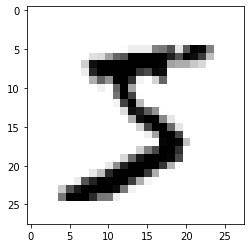

In [ ]:
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.binary)

(5, 5)


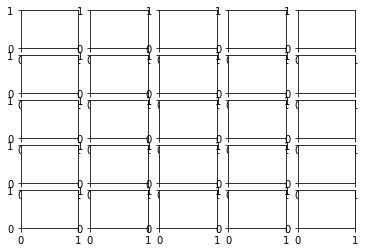

In [ ]:
import matplotlib.image as matimg
import matplotlib.pyplot as plt
import random
import math

def plot_imgs(images=1):
    row, col = int(math.sqrt(images)), int(math.sqrt(images))
    fig, axs = plt.subplots(nrows=row, ncols=col)
    print(axs.shape)
    # for ax_row in axs:
    #     for j in range(1, col+1):
    #         r_in = random.randint(0,70000)
    #         plt.subplots(i, j)
    #         plt.imshow(X[r_in].reshape(28, 28), cmap=plt.cm.binary)
    #         # plt.axis(False)
plot_imgs(30)

'0'

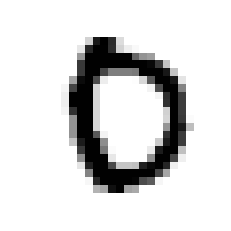

In [ ]:
import matplotlib.pyplot as plt
import random

r_in = random.randint(0,70000)
plt.imshow(X[r_in].reshape(28, 28), cmap=plt.cm.binary); plt.axis(False)
y[r_in]

In [ ]:
import numpy as np

y = y.astype(np.uint8)

In [ ]:
import matplotlib.pyplot as plt

def plot_digits(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances)-1) // images_per_row + 1
    n_empty = n_rows*images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size*size))], axis=0)
    images_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = images_grid.transpose(0, 2, 1, 3).reshape(n_rows*size, images_per_row*size)
    plt.imshow(big_image, cmap=plt.cm.binary, **options)
    plt.axis("off")

In [ ]:
partition = 0.14285
tset = int(len(X)*(1-partition))
X_train, X_test, y_train, y_test = X[:tset], X[tset:], y[:tset], y[tset:]
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

## Binary Classfication

### train binary classifier for 5

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
some_digit = X[r_in]

sgd_clf.predict([some_digit])

array([False])

In [ ]:
## trying cross validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
# our accuracy is quite high but what if we create a dump classifier which will predict every images as "not-5"

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never5_clf = Never5Classifier()
cross_val_score(never5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
## and it is above 90% because according to dataset there are 10 different image of same amount

array([0.91125, 0.90855, 0.90915])

### Confusion matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_5_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_5_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
# a perfect confusion matrix has non-zero at its (top-left to bottom-right)
y_train_perfect_pred = y_train_5
confusion_matrix(y_train_5, y_train_perfect_pred)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
# Precision & Recall

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_5_pred), recall_score(y_train_5, y_train_5_pred)

(0.8370879772350012, 0.6511713705958311)

In [ ]:
# f1_score
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_5_pred)


0.7325171197343846

In [ ]:
while True:
    r_in = random.randint(0,60000)
    pred = sgd_clf.predict([X_train[r_in]])
    if pred[0].astype(bool) and y_train_5[r_in] == False:
        break
some_digit = X_train[r_in]

In [ ]:
y_score = sgd_clf.decision_function([some_digit])
threshold = 0
y_score, True if (y_score > threshold) else False

(array([1175.85889187]), True)

In [ ]:
# if we inc threshold it dec. recall
threshold = 8000
y_score > threshold

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

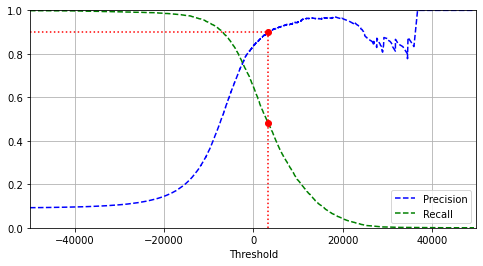

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.legend()
    plt.xlabel("Threshold")
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
thresholds_90_precision = thresholds[np.argmax(precisions >= 0.90)]
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([thresholds_90_precision, thresholds_90_precision], [0., 0.9], "r:")
plt.plot([-50000, thresholds_90_precision], [0.9, 0.9], "r:")
plt.plot([thresholds_90_precision, thresholds_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([thresholds_90_precision], [0.9], "ro")
plt.plot([thresholds_90_precision], [recall_90_precision], "ro")
plt.show()

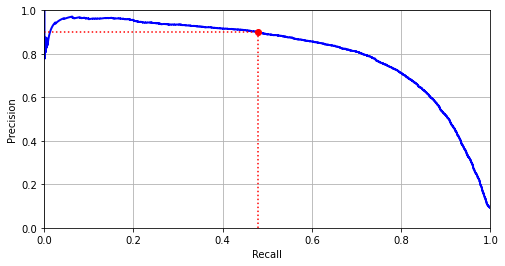

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 4))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [ ]:
thresholds_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= thresholds_90_precision)
precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90)

(0.9000345901072293, 0.4799852425751706)

In [ ]:
## ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

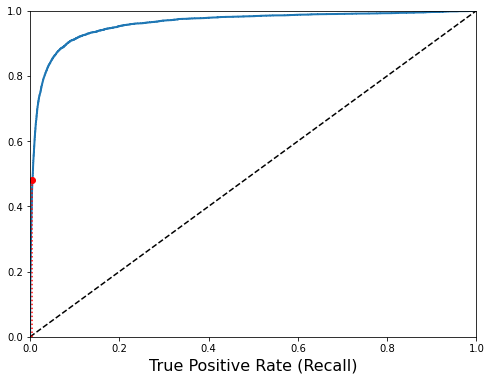

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (Fall-out)", fontsize=16)
    plt.xlabel("True Positive Rate (Recall)", fontsize=16)
    plt.grid(False)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                    method="predict_proba")


In [ ]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)


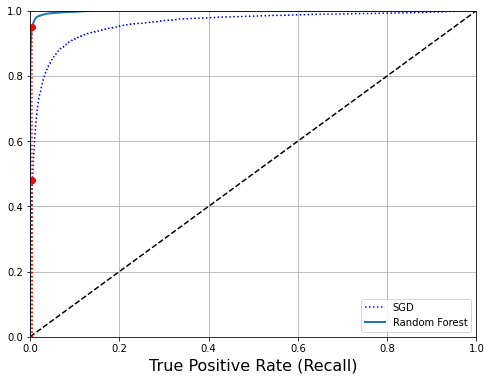

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest), recall_score(y_train_5, y_train_pred_forest)

(0.9905083315756169, 0.8662608374838591)

## Multiclass Classification

### Classifier

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-15292.46553986, -18610.72303816,  -9597.78314487,
          2851.21672449, -17884.31689877,  -1635.7080165 ,
        -49187.14649703,  -9000.25207269,  -2014.58948654,
        -13315.42995581]])

In [ ]:
np.argmax(some_digit_scores), sgd_clf.classes_, sgd_clf.classes_[np.argmax(some_digit_scores)]

(3, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), 3)

In [ ]:
## using OvO classifier
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
len(ovo_clf.estimators_)

45

In [ ]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
forest_clf.predict_proba([some_digit])

array([[0.01, 0.  , 0.01, 0.83, 0.  , 0.11, 0.  , 0.  , 0.01, 0.03]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### Error Analysis

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

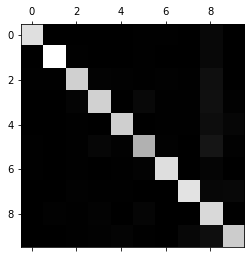

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

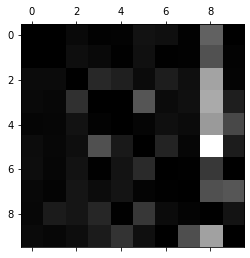

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same argumen

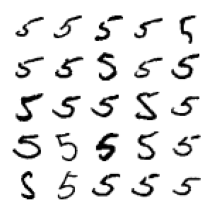

In [ ]:
## check 3s and 5s coz they cause problem with each other

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(221); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(221); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(221); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### Multilabel classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

### multioutput classification

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test


In [ ]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(121); plot_digit(y_test_mod[some_index])
plt.show()

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod, y_test_mod])
plot_digit(clean_digit)

# Exercise

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=4)

# grid_search = GridSearchCV(knn_clf, param_grid, cv=5, 
#                            scoring="accuracy", return_train_score=True, 
#                            verbose=2)

knn_clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [ ]:
from sklearn.metrics import accuracy_score

knn_pred = knn_clf.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9714

In [ ]:
from scipy.ndimage.interpolation import shift
def shift_digit(image, dy, dx):
    image = image.reshape((28 ,28))
    shifted_image = shift(image, [dy, dx], mode="constant", cval=0)
    return shifted_image.reshape([-1])

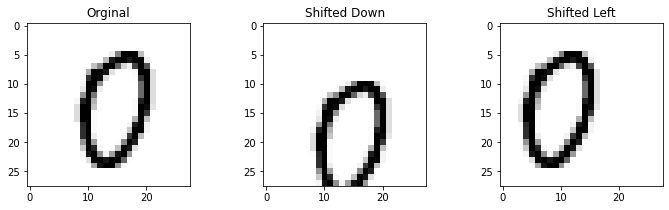

In [ ]:
image = X_train[1000]


shifted_image_down = shift_digit(image, 5, 0)
shifted_image_left = shift_digit(image, 0, -5)

plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.title("Orginal")
plt.imshow(image.reshape((28, 28)), cmap="Greys", interpolation="nearest")
plt.subplot(132)
plt.title("Shifted Down")
plt.imshow(shifted_image_down.reshape((28, 28)), cmap="Greys", interpolation="nearest")
plt.subplot(133)
plt.title("Shifted Left")
plt.imshow(shifted_image_left.reshape((28, 28)), cmap="Greys", interpolation="nearest")
plt.show()

In [ ]:
X_train_augmented = X_train
y_train_augmented = y_train

for dy, dx in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip([image for image in X_train], [label for label in y_train]):
        X_train_augmented = np.append(X_train_augmented, [shift_digit(image, dy, dx)], axis=0)
        y_train_augmented = np.append(y_train_augmented, label)

# X_train_augmented = np.array(X_train_augmented)
# y_train_augmented = np.array(y_train_augmented)


In [ ]:
import numpy as np

np.append([[1, 2], [3, 4]], [[5, 6]], axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
y_train.shape

(60000,)